# Homework 4 Solutions

# Problem 1

#### Let’s compare reservoirs with normal and reverse faulting regimes (onshore). For both regimes, plot the limits of $S_1$ and $S_3$ versus depth from $0$ to $5 km$ assuming hydrostatic pore pressure and a state of stress limited by frictional strength of faults. Assume sliding friction coefficient is $\mu=0.6$. For both regimes, how does changing $\mu$ from $0.6$ to $1.0$ change the maximum possible differential stress $S_1-S_3$ at a fixed depth of $z=5 km$? Explain what that friction coefficient change physically means.

Normal faulting occurs in tectonically passive or extensional environments, such that $S_V > S_{Hmax} > S_{hmin}$, where $S_1 = S_V$, $S_2 = S_{Hmax}$, $S_3 = S_{hmin}$. 

Reverse faulting occurs in “strong” tectonically compressive environments, such that $S_{Hmax} > S_{hmin} > S_V$, where $S_1 = S_{Hmax}$, $S_2 = S_{hmin}$, $S_3 = S_V$. 

We assume the pore pressure gradient is 10 MPa/km and the overburden gradient is 23 MPa/km.

$q$ (friction parameter function of the friction angle) is related to $\mu$ (friction coefficient) through the equation:

$$q=(\sqrt{\mu^2+1}+\mu)^2$$

From the below graphs, the higher the friction coefficient ($\mu$), the larger $\sigma_1-\sigma_3$ is. Physically this means a stronger fault.

In general, $\sigma_3$ (minimum effective stress) is related to $\sigma_1$ (maximum effective stress) through the equation:

$$\sigma_1=S_o+q\sigma_3$$

Because there is a lack of cohesive strength in the Earth's crust at the large scale we have:

$$\sigma_1=q\sigma_3$$
<br>
$$\sigma_3=\frac{\sigma_1}{q}$$

Where $\sigma_1 = S_1 - P_p$ and $\sigma_3 = S_3 - P_p$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Pressure Gradients Assumed
PpGradient = 10 # dPp/dz = 10 MPa/km
SvGradient = 23 # dSv/dz =  23 MPa/km

## Case when friction coefficient is 0.6
mu1 = 0.6 # define mu, friction coefficient
q1=(((mu1**2+1)**0.5)+mu1)**2 # calculates q, friction parameter function of the friction angle
print ("When the friction coefficent u=0.6, q is calculated to be",round(q1,2))

# Normal Faulting
plt.subplot(3, 2, 1)
depth = np.linspace(0, 5, 5) # depth in km
plt.plot(depth*PpGradient, depth, '-b', label='$P_p$',) # Pp (Data)
plt.plot(depth*SvGradient, depth, '-r', label='$S_1=S_v$') # S1 = Sv (Data)
plt.plot((depth*SvGradient-depth*PpGradient)/q1+depth*PpGradient, depth, '--g', label='$S_3=S_{hmin}$') #S3 = Shmin (Calculated)
# Plot labels
plt.xlabel('Pressure [MPa]')
plt.ylabel('Depth [km]')
plt.title("Normal Faulting ($\mu=0.6$)")
plt.legend()
# Axis range
plt.xlim([0, 140])
plt.ylim([5, 0])

# Reverse Faulting
plt.subplot(3, 2, 2)
depth = np.linspace(0, 5, 5) # depth in km
plt.plot(depth*PpGradient, depth, '-b', label='$P_p$') # Pp (Data)
plt.plot((depth*SvGradient-depth*PpGradient)*q1+depth*PpGradient, depth, '--g', label='$S_1=S_{Hmax}$') # S1 = SHmax (Calculated)
plt.plot(depth*SvGradient, depth, '-r', label='$S_3=S_v$') # S3 = Sv (Data)
# Plot labels
plt.xlabel('Pressure [MPa]')
plt.ylabel('Depth [km]')
plt.title("Reverse Faulting ($\mu=0.6$)")
plt.legend()
# Axis range
plt.xlim([0, 500])
plt.ylim([5, 0])

## Case when friction coefficient is 1
mu2 = 1 # define mu, friction coefficient
q2=(((mu2**2+1)**0.5)+mu2)**2 # calculates q, friction parameter function of the friction angle
print ("When the friction coefficent u=1, q is calculated to be",round(q2,2))

# Normal Faulting
plt.subplot(3, 2, 3)
depth = np.linspace(0, 5, 5) # depth in km
plt.plot(depth*PpGradient, depth, '-b', label='$P_p$',) # Pp (Data)
plt.plot(depth*SvGradient, depth, '-r', label='$S_1=S_v$') # S1 = Sv (Data)
plt.plot((depth*SvGradient-depth*PpGradient)/q1+depth*PpGradient, depth, '--g', label='$S_3=S_{hmin}$') #S3 = Shmin (Calculated)
# Plot labels
plt.xlabel('Pressure [MPa]')
plt.ylabel('Depth [km]')
plt.title("Normal Faulting ($\mu=1$)")
plt.legend()
# Axis range
plt.xlim([0, 140])
plt.ylim([5, 0])

# Reverse Faulting
plt.subplot(3, 2, 4)
depth = np.linspace(0, 5, 5) # depth in km
plt.plot(depth*PpGradient, depth, '-b', label='$P_p$') # Pp (Data)
plt.plot((depth*SvGradient-depth*PpGradient)*q1+depth*PpGradient, depth, '--g', label='$S_1=S_{Hmax}$') # S1 = SHmax (Calculated)
plt.plot(depth*SvGradient, depth, '-r', label='$S_3=S_v$') # S3 = Sv (Data)
# Plot labels
plt.xlabel('Pressure [MPa]')
plt.ylabel('Depth [km]')
plt.title("Reverse Faulting ($\mu=1$)")
plt.legend()
# Axis range
plt.xlim([0, 500])
plt.ylim([5, 0])

## Comparing S1-S3

# Normal Faulting
plt.subplot(3, 2, 5)
depth = np.linspace(0, 5, 5) # depth in km
S1 = depth*SvGradient
S3_1 = (depth*SvGradient-depth*PpGradient)/q1+depth*PpGradient
S3_2 = (depth*SvGradient-depth*PpGradient)/q2+depth*PpGradient
plt.plot(S1-S3_1, depth, label='$\mu=0.6$') # S1-S3 (friction coefficient is 0.6)
plt.plot(S1-S3_2, depth, label='$\mu=1$') # S1-S3 (friction coefficient is 1)
# Plot labels
plt.xlabel('Pressure [MPa]')
plt.ylabel('Depth [km]')
plt.title("Normal Faulting ($S_1-S_3$)")
plt.legend()
# Axis range
plt.xlim([0, 140])
plt.ylim([5, 0])

# Reverse Faulting
plt.subplot(3, 2, 6)
depth = np.linspace(0, 5, 5) # depth in km
S1_1 = (depth*SvGradient-depth*PpGradient)*q1+depth*PpGradient
S1_2 = (depth*SvGradient-depth*PpGradient)*q2+depth*PpGradient
S3 = depth*SvGradient
plt.plot(S1_1-S3, depth, label='$\mu=0.6$') # S1-S3 (friction coefficient is 0.6)
plt.plot(S1_2-S3, depth, label='$\mu=1$') # S1-S3 (friction coefficient is 1)
# Plot labels
plt.xlabel('Pressure [MPa]')
plt.ylabel('Depth [km]')
plt.title("Reverse Faulting ($S_1-S_3$)")
plt.legend()
# Axis range
plt.xlim([0, 500])
plt.ylim([5, 0])

# Change plot size
fig = plt.gcf()
fig.set_size_inches(15, 15)
print("In the below graphs, dashed line signifies stresses that were calculated while solid line indicates stresses that were")
print("directly calculated from assumed pressure gradients")

When the friction coefficent u=0.6, q is calculated to be 3.12
When the friction coefficent u=1, q is calculated to be 5.83
In the below graphs, dashed line signifies stresses that were calculated while solid line indicates stresses that were
directly calculated from assumed pressure gradients


In [2]:
import pandas as pd

excel_file = 'HW4.xlsx'
DataQ2 = pd.read_excel(excel_file, sheet_name=0)
DataQ2.head()

,Normal Faulting,Depth [km],Pp [MPa],Sv [MPa],σv [MPa],Shmin [MPa],σhmin [MPa],S1-S3 [MPa],Reverse Faulting,SHmax [MPa],σHmax [MPa],S1-S3 [MPa].1,-,-.1,-.2,-.3,-.4
0,Sv > SHmax > Shmin,0,0,0,0,0.00000,0.00000,0.00000,SHmax > Shmin > Sv,0.00000,0.00000,0.00000,-,Pore Pressure Gradient,dPp/dz,10,[Mpa/km]
1,-,1,10,23,13,14.16743,4.16743,8.83257,-,50.55257,40.55257,27.55257,-,Overburden Gradient,dSv/dz,23,[Mpa/km]
2,-,2,20,46,26,28.33486,8.33486,17.66514,-,101.10514,81.10514,55.10514,-,Friction Coefficient,μ,0.6,[-]
3,-,3,30,69,39,42.50229,12.50229,26.49771,-,151.65771,121.65771,82.65771,-,Friction Parameter Function,q,3.11943,[-]
4,-,4,40,92,52,56.66972,16.66972,35.33028,-,202.21028,162.21028,110.21028,-,-,-,-,-


# Problem 2

#### A given site offshore (sea floor at $500 ft$) is subjected to a Normal Faulting stress regime. Over-pressure is first detected at $1500$ ft (TVD) and at $2000 ft$ overpressure is $\lambda_p=0.78$. Calculate the total minimum horizontal stress $S_hmin$ at this depth assuming frictional equilibrium of faults and friction angle $30°$. Draw the corresponding Mohr circle with a solid line and draw an additional Mohr circle with a dashed line assuming hydrostatic pressure. (Assume typical water and lithostatic gradients)

We assume the pore pressure gradient is 0.44 psi/ft and the overburden gradient is 1 psi/ft.

The overburden at 2000 ft is the summation of the overlying hydrostatic head of water and the remaining pressure head to that depth:

$$S_v=500\times0.44+1500\times 1=1720 psi$$

The actual pore pressure at any depth beyond 1500 ft TVD where overpressure was first detected can be calculated since the overpressure parameter $\lambda_p$ of 0.78 is given. The actual pore pressure at 2000 ft would be:

$$P_p=S_v\times\lambda_p=1720\times0.78=1342 psi$$

So the effective vertical stress is:

$$\sigma_v=S_v-P_p=1720-1342=378 psi$$

In general, $\sigma_3$ (minimum effective stress) is related to $\sigma_1$ (maximum effective stress) through the equation:

$$\sigma_1=S_o+q\sigma_3$$

Because there is a lack of cohesive strength in the Earth's crust at the large scale we have:

$$\sigma_1=q\sigma_3$$
<br>
$$\sigma_3=\frac{\sigma_1}{q}$$

$q$ (friction parameter function of the friction angle) is related to $\varphi$ (friction angle) through the equation

$$q=\frac{1+sin\varphi}{1-sin\varphi}=\frac{1+sin(30°)}{1-sin(30°)}=3$$

For a normal faulting regime, $\sigma_V > \sigma_{Hmax} > \sigma_{hmin}$, where $\sigma_1 = \sigma_V$, $\sigma_2 = \sigma_{Hmax}$, $\sigma_3 = \sigma_{hmin}$, we can calculate $\sigma_{hmin}$ to be:

$$\sigma_{hmin}=\frac{\sigma_V}{q}=\frac{378}{3}=126psi$$

The total minimum horizontal stress is:

$$S_{hmin}=\sigma_{hmin}+P_p=126+1342=1468 psi$$

This procedure can be repeated for hydrostatic pressure (overpressure parameter $\lambda_p$ of 0.44) to give:

$$\sigma_v=S_v-P_p=1720-880=840 psi$$
<br>
$$\sigma_{hmin}=\frac{\sigma_V}{q}=\frac{840}{3}=280 psi$$

In [3]:
import pandas as pd

excel_file = 'HW4.xlsx'
DataQ2 = pd.read_excel(excel_file, sheet_name=1)
DataQ2.head()

,Location,Depth [ft],Actual Pp [psi],Normal Pp [psi],Sv [psi],Actual σv [psi],Normal σv [psi],Actual Shmin [psi],Normal Shmin [psi],Actual σhmin [psi],Normal σhmin [psi],-,Pore Pressure Gradient,dPp/dz,0.44,[psi/ft]
0,Surface,0,0.0,0,0,0.0,0,0.000000,0.000000,0.000000,0.000000,-,Overburden Gradient,dSv/dz,1.00,[psi/ft]
1,Seafloor,500,220.0,220,220,0.0,0,220.000000,220.000000,0.000000,0.000000,-,Overpressure Parameter,λp,0.78,[-]
2,Rock,1500,660.0,660,1220,560.0,560,846.666667,846.666667,186.666667,186.666667,-,Friction Angle,φ,30.00,[°]
3,TVD,2000,1341.6,880,1720,378.4,840,1467.733333,1160.000000,126.133333,280.000000,-,Friction Parameter Function,q,3.00,[-]


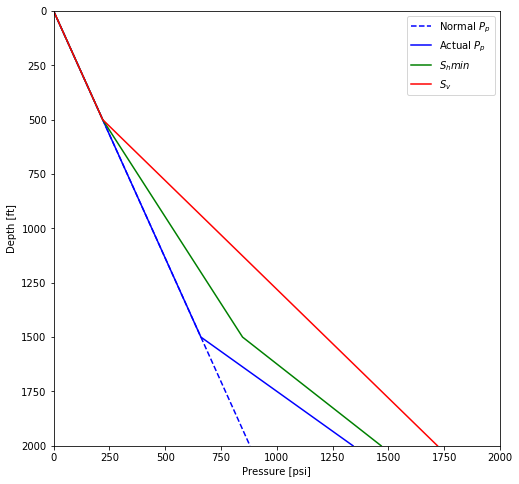

In [4]:
import numpy as np
import matplotlib.pyplot as plt

Depth = DataQ2['Depth [ft]']
Pp_normal = DataQ2['Normal Pp [psi]']
Pp_actual = DataQ2['Actual Pp [psi]']
Shmin_normal = DataQ2['Normal Shmin [psi]']
Shmin_actual = DataQ2['Actual Shmin [psi]']
Sv = DataQ2['Sv [psi]']

# Change plot size
fig = plt.gcf()
fig.set_size_inches(8, 8)

# Plot data
plt.plot(Pp_normal,Depth,'--b', label='Normal $P_p$')
plt.plot(Pp_actual,Depth,'-b', label='Actual $P_p$')
plt.plot(Shmin_actual,Depth,'-g', label='$S_hmin$')
plt.plot(Sv,Depth,'-r', label='$S_v$')
# Plot labels
plt.xlabel('Pressure [psi]')
plt.ylabel('Depth [ft]')
plt.legend()
# Axis range
plt.xlim([0, 2000])
plt.ylim([2000, 0])
plt.show()

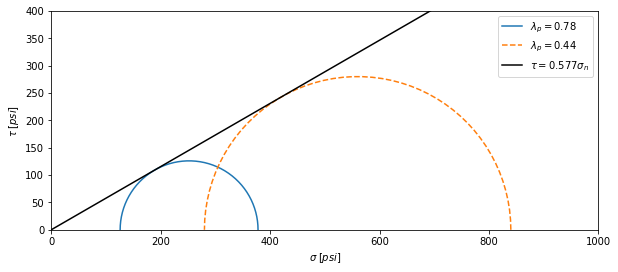

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Function for Mohr's Circle
def plotMohr3D1(sig3,sig2,sig1):
    circle1X=[]
    circle1Y=[]
    circle2X=[]
    circle2Y=[]
    circle3X=[]
    circle3Y=[]
    for i in np.linspace(0,np.pi):
        circle1X.append((sig2-sig3)/2*np.cos(i) + (sig3+(sig2-sig3)/2))
        circle2X.append((sig1-sig2)/2*np.cos(i) + (sig2+(sig1-sig2)/2))
        circle3X.append((sig1-sig3)/2*np.cos(i) + (sig3+(sig1-sig3)/2))
        circle1Y.append((sig2-sig3)/2*np.sin(i) )
        circle2Y.append((sig1-sig2)/2*np.sin(i) )
        circle3Y.append((sig1-sig3)/2*np.sin(i) )
    plt.plot(circle2X,circle2Y,'-',label=r'$\lambda_p=0.78$')
    # Plot labels
    plt.xlabel(r'$\sigma \; [MPa]$')
    plt.ylabel(r'$\tau \; [MPa]$')
    # Plot layout
    plt.axis('square')
    plt.tight_layout()
    # Axis range
    plt.xlim([0, 1000])
    plt.ylim([0, 400])

def plotMohr3D2(sig3,sig2,sig1):
    circle1X=[]
    circle1Y=[]
    circle2X=[]
    circle2Y=[]
    circle3X=[]
    circle3Y=[]
    for i in np.linspace(0,np.pi):
        circle1X.append((sig2-sig3)/2*np.cos(i) + (sig3+(sig2-sig3)/2))
        circle2X.append((sig1-sig2)/2*np.cos(i) + (sig2+(sig1-sig2)/2))
        circle3X.append((sig1-sig3)/2*np.cos(i) + (sig3+(sig1-sig3)/2))
        circle1Y.append((sig2-sig3)/2*np.sin(i) )
        circle2Y.append((sig1-sig2)/2*np.sin(i) )
        circle3Y.append((sig1-sig3)/2*np.sin(i) )
    plt.plot(circle2X,circle2Y,'--',label=r'$\lambda_p=0.44$')
    # Plot labels
    plt.xlabel(r'$\sigma \; [psi]$')
    plt.ylabel(r'$\tau \; [psi]$')
    # Plot layout
    plt.axis('square')
    plt.tight_layout()
    # Axis range
    plt.xlim([0, 1000])
    plt.ylim([0, 400])
    
# Plot 2d Mohr Circles
plotMohr3D1(0,126,378) # overpressure parameter of 0.78
plotMohr3D2(0,280,840) # overpressure parameter of 0.44
# Plot shear failure envelope
phi = (30 / 180) * np.pi # calculate friction angle
q = (1+np.sin(phi))/(1-np.sin(phi)) # calculate friction parameter function of the friction angle
mu = (q-1)/(2*(q)**0.5) # calculate friction coefficient
plt.plot([0,1000],[0, 1000 * mu],'k-',label=r'$\tau = 0.577 \sigma_n$')

# Change plot size
fig = plt.gcf()
fig.set_size_inches(8, 6)
# Plot legend
plt.legend()

# Problem 3

#### Find out the orientations of (a) a hydraulic fracture and (b) a shear fracture both created in a site subjected to stresses $S_v < S_{hmin}< S_{Hmax}$ where $S_{Hmax}$ strikes E-W and $\mu=0.8$.

![](files/HW4_Q3.jpg)

The strike line is a line representing the intersection of the feature of interest with a horizontal plane. The magnitude of the strike ($\phi$) is the angle between the strike line and north. Strike can be given in quadrant convention (N45°E) or in azimuth convention (a single three digit number ranging from 0 to 360° measured from the North in clockwise direction (045°).

The dip ($\delta$) is the angle between a horizontal plane and the feature under consideration. Dip is given by the number (0°-90°) as well as a letter (N,S,E,W) with rough direction in which the bed is dipping downwards.

We have a reverse fault since $S_v < S_{hmin}< S_{Hmax}$.

##### a) For hydraulic fracture,

Hydraulic fracture will propagate along a plane perpendicular to the least principal stress. In this case, the hydraulic fracture would propagate in the horizontal direction perpendicular to $S_v$.

Strike ($\phi$) = 090° (E-W)

Dip ($\delta$) = 90° 

##### b) For shear fracture,

Orientation of shear fracture ($\alpha$) is expressed in degrees from a vertical plane perpendicular to $S_{Hmax}$:

$$\varphi=tan^{-1}(\mu)=tan^{-1}(0.8)=38.7°$$
<br>
$$\alpha=45° + \frac{\varphi}{2} = 45 + \frac{38.7°}{2}=64.3°$$

The hanging wall block will move up along the direction of $S_{Hmax}$ relative to the foot wall.

For shear fracture 1 (<font color='red'>SF1</font>),

Strike ($\phi$) = 000° (N-S)

Dip ($\delta$) = 25.7°W

For shear fracture 2 (<font color='blue'>SF2</font>),

Strike ($\phi$) = 000° (N-S)

Dip ($\delta$) = 25.7°E


# Problem 4

#### Find out the orientations of (a) a hydraulic fracture and (b) a shear fracture both created in a site subjected to stresses $S_{hmin} < S_v< S_{Hmax}$ where $S_{Hmax}$ strikes W20°N and $\mu=0.5$.

![](files/HW4_Q4.jpg)

We have a strike-slip fault since $S_{hmin} < S_v< S_{Hmax}$

##### a) For hydraulic fracture,

Hydraulic fracture will propagate along a plane perpendicular to the least principal stress. In this case, the hydraulic fracture would propagate in a direction perpendicular to $S_Hmax$.

Strike ($\phi$) = 110° (W20°N or E20°S)

Dip ($\delta$) = 90°

##### b) For shear fracture,

Orientation of shear fracture ($\alpha$) is expressed in degrees from a vertical plane perpendicular to $S_{Hmax}$:

$$\varphi=tan^{-1}(\mu)=tan^{-1}(0.5)=26°$$
<br>
$$\alpha=45° + \frac{\varphi}{2} = 45 + \frac{26°}{2}=58°$$

For shear fracture 1 (<font color='red'>SF1</font>),

Strike ($\phi$) = 078° (W12°S)

Dip ($\delta$) = 90°

For shear fracture 2 (<font color='blue'>SF2</font>),

Strike ($\phi$) = 142° (W52°N)

Dip ($\delta$) = 90°

# Problem 5

#### For the following faults: (i) draw the corresponding points in a stereonet (lower hemisphere projection) map, (ii) convert to strike to azimuth convention, and (iii) draw equivalent geological map symbols.
##### a) N55°E, 45°SE
##### b) E20°S, 60°NE
##### c) N20°W, 25°SW
##### d) S10°W, 60°NW

Parse quadrant azimuth measurements
"N55E" --> 55.0
"E20S" --> 110.0
"N20W" --> 340.0
"S10W" --> 190.0

Parse quadrant strike/dip measurements.
"N55E/45SE" --> Strike: 55.0, Dip: 45.0
"E20S/60NE" --> Strike: 290.0, Dip: 60.0
"N20W/25SW" --> Strike: 160.0, Dip: 25.0
"S10W/60NW" --> Strike: 190.0, Dip: 60.0


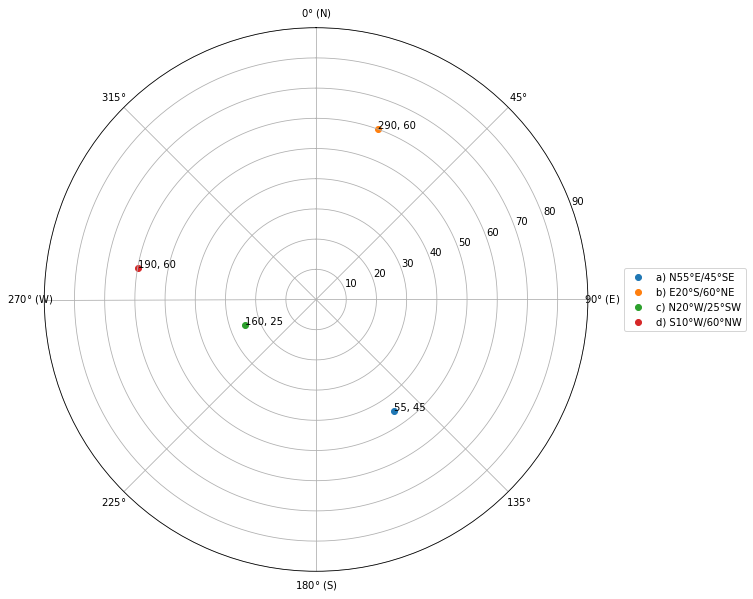

<Figure size 1080x1440 with 0 Axes>

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import mplstereonet

# Basic quadrant and strike/dip parsing (https://github.com/joferkington/mplstereonet)
print('Parse quadrant azimuth measurements')
for original in ['N55E', 'E20S', 'N20W', 'S10W']:
    azi = mplstereonet.parse_quadrant_measurement(original)
    print('"{}" --> {:.1f}'.format(original, azi))

print('\nParse quadrant strike/dip measurements.')
def parse_sd(original, seperator):
    strike, dip = mplstereonet.parse_strike_dip(*original.split(seperator))
    print('"{}" --> Strike: {:.1f}, Dip: {:.1f}'.format(original, strike, dip))
parse_sd('N55E/45SE', '/') 
parse_sd('E20S/60NE', '/')
parse_sd('N20W/25SW', '/')
parse_sd('S10W/60NW', '/')

# Strike and dip data to be plotted
strike =np.array([55,290,160,190])
dip = np.array([45,60,25,60])
legend = ['a) N55°E/45°SE','b) E20°S/60°NE','c) N20°W/25°SW','d) S10°W/60°NW']
# Convert data to polar coordinates
theta = (strike + 90)/180 * np.pi 
r = dip

# Polar plot 
ax = plt.subplot(111, projection='polar')
# Change plot size
fig = plt.gcf()
fig.set_size_inches(10, 10)
# Plot size
fig = plt.figure(figsize=(15, 20))
# Polar plot properties
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)
ax.set_xticklabels(['$0°$ (N)', '$45°$', '$90°$ (E)', '$135°$', '$180°$ (S)', '$225°$', '$270°$ (W)', '$315°$'])
ax.set_rlabel_position(70)
# Axis range
ax.set_ylim(0,90)
# Plot data
for i in range(len(strike)):
    ax.scatter(theta[i], r[i],label=legend[i])
    ax.text(theta[i] * (1 + 0), r[i] * (1 + 0), '%d, %d' % (strike[i], r[i]))
# Plot legend
ax.legend(loc="center right",bbox_to_anchor=(0.8, 0, 0.5, 1))
# Plot
plt.show()

![](files/HW4_Q5iii.jpg)

# Problem 6

#### In a given reservoir under study stresses are $S_{hmin}=40 MPa$, $S_{Hmax}=60 MPa$, $S_v=45 MPa$, $P_p= 20MPa$, and $S_{hmin}$ acts E-W. For each of the faults below, calculate (using the Mohr Circle method if possible) the normal and shear stress on the plane of the fault and then determine if the fault is prone to slip ($\mu=0.6$).

With $P_p= 20MPa$, we have:

$\sigma_{hmin}=\sigma_3=20 MPa$, $\sigma_{Hmax}=\sigma_1=40 MPa$, $\sigma_v=\sigma_2=25 MPa$

In general, the shear and normal effective stresses are given by:

$$\sigma_n = C + R \times cos(2\times \alpha)$$
<br>
$$\tau = R \times sin(2\times \alpha)$$

##### a) Fault with strike north-south, dip 65° to the east

With $S_v > S_{hmin}$ we have dip-slip normal

$C=\frac{\sigma_2+\sigma_3}{2}=\frac{25+20}{2} = 22.5 MPa$
<br>
$R =\frac{\sigma_2-\sigma_3}{2}=\frac{25-20}{2} = 2.5 MPa$
<br>
$\alpha = 65°$
<br>
$\tau = 2.5 \times sin(2 \times 65°) = 1.91 MPa$
<br>
$\sigma_n = 22.5 + 2.5 \times cos(2 \times 65°) = 20.9 MPa$
<br>
$\frac{\tau}{\sigma_n} = 0.09 < 0.6$ implies no slip

##### b) Fault with strike east-west, dip 35° to the north

With $S_{Hmax} > S_{V}$ we have dip-slip reverse

$C=\frac{\sigma_1+\sigma_2}{2}=\frac{40+25}{2} = 32.5 MPa$
<br>
$R =\frac{\sigma_1-\sigma_2}{2}=\frac{40-25}{2} = 7.5 MPa$
<br>
$\alpha = 55°$
<br>
$\tau = 7.5 \times sin(2 \times 55°) = 7.0 MPa$
<br>
$\sigma_n = 32.5 + 7.5 \times cos(2 \times 55°) = 29.9 MPa$
<br>
$\frac{\tau}{\sigma_n} = 0.23 < 0.6$ implies no slip

##### c) Fault with strike 060°, dip 90°

With $S_{Hmax} > S_{hmin}$ we have strike-slip left-lateral

$C=\frac{\sigma_1+\sigma_3}{2}=\frac{40+20}{2} = 30 MPa$
<br>
$R =\frac{\sigma_1-\sigma_3}{2}=\frac{40-20}{2} = 10 MPa$
<br>
$\alpha = 30°$
<br>
$\tau = 10 \times sin(2 \times 30°) = 8.7 MPa$
<br>
$\sigma_n = 30 + 10 \times cos(2 \times 30°) = 35 MPa$
<br>
$\frac{\tau}{\sigma_n} = 0.24 < 0.6$ implies no slip

##### d) Fault with strike 030°, dip 25°

Oblique can't solve so easily...

![](files/HW4_Q6.jpg)

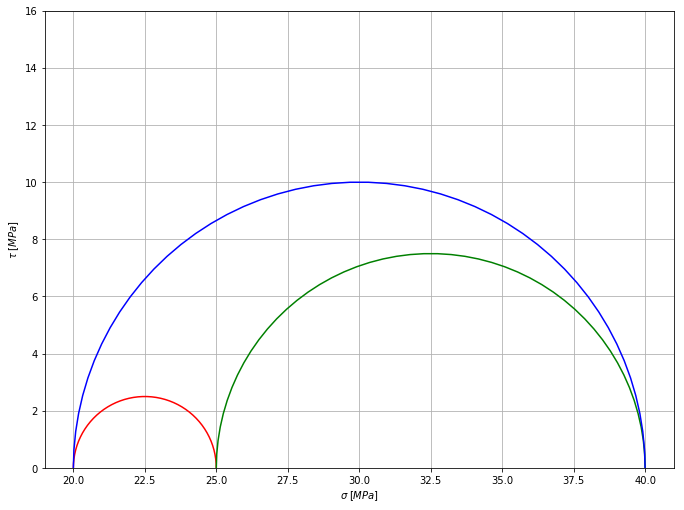

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Function for Mohr's Circle
def plotMohr3D(sig3,sig2,sig1):
    fig = plt.figure(figsize=(7,7))
    ax = fig.add_subplot(111)
    circle1X=[]
    circle1Y=[]
    circle2X=[]
    circle2Y=[]
    circle3X=[]
    circle3Y=[]
    for i in np.linspace(0,np.pi):
        circle1X.append((sig2-sig3)/2*np.cos(i) + (sig3+(sig2-sig3)/2))
        circle2X.append((sig1-sig2)/2*np.cos(i) + (sig2+(sig1-sig2)/2))
        circle3X.append((sig1-sig3)/2*np.cos(i) + (sig3+(sig1-sig3)/2))
        circle1Y.append((sig2-sig3)/2*np.sin(i) )
        circle2Y.append((sig1-sig2)/2*np.sin(i) )
        circle3Y.append((sig1-sig3)/2*np.sin(i) )
    ax.plot(circle1X,circle1Y,'r')
    ax.plot(circle2X,circle2Y,'g')
    ax.plot(circle3X,circle3Y,'b')
    # Plot labels
    plt.xlabel(r'$\sigma \; [MPa]$')
    plt.ylabel(r'$\tau \; [MPa]$')
    # Plot layout
    plt.axis('square')
    plt.tight_layout()
    ax.grid()
    # Axis range
    # plt.xlim([0, 50])
    plt.ylim([0, 16])

# Plot 2d Mohr Circles
plotMohr3D(20,25,40) # overpressure parameter of 0.78

# Change plot size
fig = plt.gcf()
fig.set_size_inches(10, 15)


# Problem 7

#### (Optional - See class notes) Write a Matlab code that can obtain ($S_n$, $\tau_d$, $\tau_s$, $\sigma_n$) on an arbitrary fault with orientation (strike, dip) for a given state of stress ($S_P$, $\alpha$, $\beta$, $\gamma$).

#### Step 1: Input parameters for principal state of stress ($S_P$)

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

# Modified from original code written by John D'Angelo

# Principal Stresses and Pore Pressure
Sv = 45
Shmax = 60
Shmin = 40
Pp = 20

# Azimuth
azimuthShmin = 90
azimuthSHmax = 90

def stressTensor(Sv,Shmax,Shmin):
    sValues = [Sv,Shmax,Shmin]
    sValues = sorted(sValues,reverse=True)
    return np.array([[sValues[0],0,0],
                    [0,sValues[1],0],
                    [0,0,sValues[2]]])

# Principal stress tensor
Sp = stressTensor(Sv,Shmax,Shmin)
print("Principal Stress Tensor [MPa]:")
print()
print(Sp)
print()

# Get effective stress, difference between total stress and pore pressure at each depth
sigV=Sv-Pp
sigHmax=Shmax-Pp
sigHmin=Shmin-Pp
# Determine sigma 1,2,3 where sig1>sig2>sig3.
arg = np.array([sigV,sigHmax,sigHmin])
sig3 = np.min(arg)
sig1 = np.max(arg)
arg = arg[np.where(arg!=sig3)]
arg = arg[np.where(arg!=sig1)]
sig2 = arg[0]

#Principal effective stress tensor
Sigp = stressTensor(sigV,sigHmax,sigHmin)
print("Principal Effective Stress Tensor [MPa]:")
print()
print(Sigp)

Principal Stress Tensor [MPa]:

[[60  0  0]
 [ 0 45  0]
 [ 0  0 40]]

Principal Effective Stress Tensor [MPa]:

[[40  0  0]
 [ 0 25  0]
 [ 0  0 20]]


#### Step 2: For the principal state of stress, classify the faulting regime (normal, strike-slip, reverse). $\alpha$, $\beta$, and $\gamma$ are needed in the change of basis matrix $R_{PG}$ from the principal state of stress to the geographical coordinate system. These  angles indicate solely the orientation of principal stresses with respect to the geographical coordinate system.

In [9]:
if(Sv>Shmax and Shmax >Shmmin):
    alpha=azimuthShmin # Azimuth of Shmin
    beta=90
    gamma=0
    Regime = "Normal"
elif(Shmax>Sv and Sv>Shmin):  
    alpha=azimuthSHmax # Azimuth of SHmax
    beta=0
    gamma=90
    Regime = "Strike-Slip"
elif(Shmax>Shmin and Shmin>Sv):
    alpha=azimuthSHmax # Azimuth of Shmax
    beta=0
    gamma=0
    Regime = "Reverse"
else:
    print("Error: Potential issue with stresses provided")

print("Faulting Regime: ")
print(Regime)
print()
print("Alpha: ")
print(alpha)
print()
print("Beta: ")
print(beta)
print()
print("Gamma: ")
print(gamma)

Faulting Regime: 
Strike-Slip

Alpha: 
90

Beta: 
0

Gamma: 
90


#### Step 3: Using the change of basis matrix $R_{PG}$, we can convert the principal state of stress ($S_P$) to its equivalent in the geographical coordinate system ($S_G$).

\begin{equation*}
R_{PG}=
\begin{vmatrix}
\cos(\alpha)cos(\beta) & sin(\alpha)cos(\beta) & -sin(\beta) \\
\cos(\alpha)sin(\beta)sin(\gamma)-sin(\alpha)cos(\gamma) & sin(\alpha)sin(\beta)sin(\gamma)+cos(\alpha)cos(\gamma) & cos(\beta)sin(\gamma) \\
\cos(\alpha)sin(\beta)cos(\gamma)+sin(\alpha)sin(\gamma) & sin(\alpha)sin(\beta)cos(\gamma)-cos(\alpha)cos(\gamma) & cos(\beta)cos(\gamma) \\
\end{vmatrix}
\end{equation*}
<br>
$$S_G = R_{PG}^T S_P R_{PG}$$

In [10]:
# Inputing the principal stress tensor at any depth in the principal directions coordinate system and 
# calculating the tensor in the geographical coordinate system.

def rotationPG(alpha,beta,gamma,units = "degrees"):
    if units.lower().strip().find("deg")!=-1:
        alpha = np.deg2rad(alpha);
        beta = np.deg2rad(beta);
        gamma = np.deg2rad(gamma);
    cA = np.cos(alpha)
    sA = np.sin(alpha)
    cB = np.cos(beta)
    sB = np.sin(beta)
    cG = np.cos(gamma)
    sG = np.sin(gamma)
    return np.round(np.array([[cA*cB, sA*cB, -sB],
                    [(cA*sB*sG - sA*cG),(sA*sB*sG+cA*cG), cB*sG ],
                    [(cA*sB*cG + sA*sG),(sA*sB*cG-cA*sG), cB*cG ]]),3)

Rot_PG = rotationPG(alpha,beta,gamma)

#Shift Sp to Sg
Sg = np.dot(np.dot(Rot_PG.T,Sp),Rot_PG)
print("Total Stress Tensor in Geographical Coordinate System [MPa]")
print()
print(Sg)

Total Stress Tensor in Geographical Coordinate System [MPa]

[[40.  0.  0.]
 [ 0. 60.  0.]
 [ 0.  0. 45.]]


#### Step 4: Define the fault plane coordinate system. The coordinate system basis is comprised of $n_n$ (dip), $n_s$ (strike), and $n_d$ (normal) vectors: d-s-n right-handed basis. The three vectors depend solely in two variables: $strike$ and  $dip$.

\begin{equation*}
n_n=
\begin{vmatrix}
-sin(strike)sin(dip) \\
cos(strike)sin(dip) \\
-cos(dip) \\
\end{vmatrix}
\end{equation*}
<br>
\begin{equation*}
n_s=
\begin{vmatrix}
cos(strike) \\
sin(strike) \\
0 \\
\end{vmatrix}
\end{equation*}
<br>
\begin{equation*}
n_d=
\begin{vmatrix}
-sin(strike)cos(dip) \\
cos(strike)cos(dip) \\
sin(dip) \\
\end{vmatrix}
\end{equation*}

#### We then project the stress tensor based on the geographical coordinate system onto the fault base vectors. The stress vector acting on the plane of the fault is $t$ (note that $t$ is not necessarily aligned with $n_d$, $n_s$ or $n_n$) and is calculated according to:

$$t = S_G n_n$$
<br>
The total normal stress on the plane of the fault is $S_n$ (aligned with $n_n$):
<br>
$$S_n = t \cdot n_n$$
<br>
The effective normal stress on the fault plane is $\sigma_n = S_n - P_p $. The shear stresses on the plane of the fault is aligned with $n_d$ and $n_s$ are:
<br>
$$\tau_d = t \cdot n_d$$
<br>
$$\tau_s = t \cdot n_s$$

#### We apply this code to solve stress on 100 fractures randomly oriented and plot all the results in the respective 3D Mohr circle.

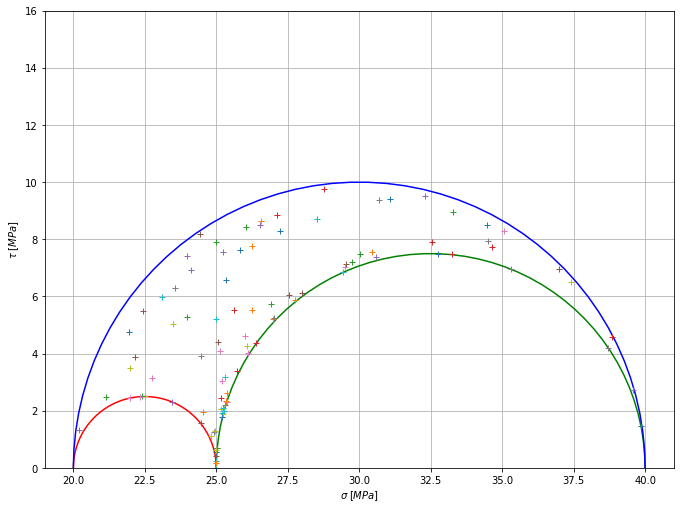

In [12]:
# Max dip angle = 90 deg
# Max stirke angle = 180 deg
numSamples = 100
strikeArray = np.random.randint(360, size= numSamples)
dipArray = np.random.randint(90, size=numSamples)

# Compute effective normal stress and shear stress
def calcNVectors(strike,dip,units = "degrees"):
    if units.lower().strip().find("deg")!=-1:
        strike = np.deg2rad(strike)
        dip = np.deg2rad(dip)
    cS = np.cos(strike)
    sS = np.sin(strike)
    cD = np.cos(dip)
    sD = np.sin(dip)
    nDict = {}
    nDict['n'] = np.array([[-sS*sD, cS*sD, -cD]]).T
    nDict['s'] = np.array([[cS,sS,0]]).T
    nDict['d'] = np.array([[-sS*cD, cS*cD, sD]]).T
    return nDict

ax = plotMohr3D(sig3,sig2,sig1)

#Plot all the associated stress values on the Mohr's circle as + symbols
for i in range(0,len(dipArray)):
    nDict = calcNVectors(strikeArray[i],dipArray[i])
    t = np.dot(Sg,nDict['n'])
    Sn = np.dot(nDict['n'].T,t) #Total normal stress
    sign = Sn - Pp
    tau = np.sqrt(np.linalg.norm(t,2)**2 - Sn**2)
    plt.plot(sign,tau,'+')
    
# Change plot size
fig = plt.gcf()
fig.set_size_inches(10, 15)

##### If a nearby injection wellbore performs water flooding, what is the additional pore pressure needed to reactivate the faults?

The closest distance from the shear failure line to the 3D Mohr circle is the additional pressure needed to start reactivating (in shear) the fractures and/or faults under those in-situ conditions

# Problem 8

#### (Real application problem) The following page contains seismic images (http://www.glossary.oilfield.slb.com/Terms/c/crossline.aspx) of a section the subsurface in the North Sea. We are interested in the Frigg sandstone formation. This is a hydrocarbon-bearing formation and it is located at about $1790 m$ of TVDSS.
##### a) Calculate the water depth by measuring the two-way travel time and assuming $V_P$(sea-water) = $1450 m/s$.

With $V_{p,water}=1450 m/s$, the two-way travel time $\Delta t= 130 ms =0.13 s$

Travel length $L = V_{p,water} \cdot \Delta t = 1450 \cdot 0.13=188.5 m$

Therefore the water depth is L/2 = 94.25m

##### b) Find the location of the Frigg Formation in the time axis assuming $V_P$(sediments) = $3000 m/s$.

The two-way travel time across the entire seismic length (entire image) $\Delta t= 1500 ms =1.5 s$

Total seismic length $L = V_{p,rock} \cdot \Delta t /2= 3000 \cdot 1.5/2=4500/2= 2250m = 2.25 km$

Frigg formation depth is given as 1790m, then

Total travel time $\Delta t=\Delta t_{water}+\Delta t_{rock}=L_{water}/V_{p,water}+L_{rock}/V_{p,rock}=0.130 s + [(1790m-94.25m)\cdot 2]/3000 m/s=0.130 s + 1.1305 s = 1260.5 ms$ 

##### c) Evaluate qualitatively the faulting at the reservoir depth. Describe how faulting could affect fluid flow.

There appears to be faults at the Frigg formation depth. Faults may compartmentalize the reservoir sand in multiple locations.

![](files/HW4_Q8.jpg)